## Final Project Submission

Please fill out:
* Student name: MUTHAMA BRIAN MUTAVA
* Student pace: Full time
* Scheduled project review date/time: 03/22/2024 @ 1600HRS
* Instructor name: ASHA DEEN
* Blog post URL:


In [44]:
# Exploratory Data Analysis for Microsoft's Movie Studio

## Overview

This data analysis project aims to explore the world of movies to uncover insights that will aid Microsoft in establishing its own movie studio. By analyzing various datasets, this project seeks to understand the factors contributing to the success of movies at the box office. The analysis will focus on exploring trends, patterns, and relationships within the data to inform strategic decisions regarding movie production and distribution.

## Business Understanding

Microsoft is venturing into the movie industry with the intention of establishing its own movie studio. To ensure the success of this venture, it is essential to have a comprehensive understanding of the movie market landscape. By analyzing data from multiple sources, this project aims to address key questions such as:
- What genres of movies are currently performing well at the box office?
- How do critical and audience ratings impact the commercial success of movies?
- Are there specific production budgets associated with higher box office earnings?
- What are the potential risks and challenges in the movie industry that Microsoft should consider?

By answering these questions, this project aims to provide actionable insights that will guide Microsoft in making informed decisions regarding movie production strategies, target audiences, and marketing approaches.

## Data Understanding

Access to several datasets containing movie-related information, including:
- tmdb.movies.csv: Contains metadata about movies, including titles, genres, and release dates.
- bom.movies_gross.csv: Provides data on movie gross revenue and box office performance.
- im.db: A SQLite database containing detailed information about movies, including ratings, cast, and crew.
- rt.movie_info.tsv and rt.reviews.tsv: Include information about movies and reviews from Rotten Tomatoes.
- tn.movie_budgets.csv: Contains data on movie budgets and financial performance.

The analysis will involve exploring and cleaning these datasets to extract relevant insights. Techniques such as data visualization and statistical analysis will be utilized to uncover patterns and relationships within the data, providing valuable insights for Microsoft's movie studio venture.

# Import Libraries

The following cell imports essential libraries required for data manipulation, analysis, and visualization. These libraries include:




SyntaxError: unterminated string literal (detected at line 26) (169961346.py, line 26)

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os

# Setting up matplotlib to display graphs inline in the notebook
%matplotlib inline


Connected to the IMDb database using the sqlite3 module and loaded the im.db file to examine its contents. Displayed the tables present in the database.


In [ ]:


# Specify the correct path to the IMDb database directory
db_path = r'C:\Users\HP\dsc-phase-1-project-v2-4\zippedData\im.db\im.db'

# Connect to the IMDb database
conn = sqlite3.connect(db_path)

# Retrieve the list of tables in the database
tables = pd.read_sql("""
                    SELECT name FROM sqlite_master WHERE type='table';
                    """, conn)

# Display the tables
tables












,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


Wrote a SQL query that selects all columns (*) from both the movie_basics table (aliased as mb) and the movie_ratings table (aliased as mr). The JOIN keyword is used to combine the two tables based on the movie_id column, which is common to both tables. The result of the query is then fetched into a Pandas DataFrame named result.

In [ ]:
# Define the SQL query to join the 'movie_basics' and 'movie_ratings' tables on 'movie_id'
sql_query = '''
SELECT mb.*, mr.*
FROM movie_basics mb
JOIN movie_ratings mr ON mb.movie_id = mr.movie_id;
'''

# Execute the SQL query and fetch the results into a Pandas DataFrame
result = pd.read_sql_query(sql_query, conn)
result




,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,tt9914942,6.6,5


# Data Cleaning Process for IMDB:

# Step 1: Handled Missing Values
# - Filled missing values in the 'runtime_minutes' column with the median value to maintain central tendency.
# - Dropped rows with missing values in the 'genres' column as it was essential for our analysis.

# Step 2: Removed Duplicates
# - Removed duplicate rows to ensure each movie entry was unique.

# Step 3: Corrected Data Types
# - Converted 'start_year' to integer and 'runtime_minutes' to float for consistency and analysis purposes.




In [ ]:
# Fill missing values in 'runtime_minutes' column with the median
median_runtime = result['runtime_minutes'].median()
result['runtime_minutes'].fillna(median_runtime, inplace=True)

# Drop rows with missing values in 'genres' column
result.dropna(subset=['genres'], inplace=True)

# Remove duplicate rows
result.drop_duplicates(inplace=True)

# Convert 'start_year' to integer
result['start_year'] = result['start_year'].astype(int)

# Convert 'runtime_minutes' to float
result['runtime_minutes'] = result['runtime_minutes'].astype(float)

# Display the cleaned dataset
result.head()
result.tail()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,tt9913056,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,91.0,Documentary,tt9914642,8.5,8
73855,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,tt9916160,6.5,11


# Exploring the Distribution of Movie Ratings and Number of Votes

"""
To gain insights into the overall sentiment and popularity of movies in the dataset, 
we will visualize the distribution of movie ratings and the number of votes each movie has received.

Steps:
1. Retrieve the necessary columns from the DataFrame: 'averagerating' and 'numvotes'.
2. Plot histograms to visualize the distribution of ratings and number of votes.
3. Analyze the distribution patterns to understand the overall sentiment and popularity of movies.
"""


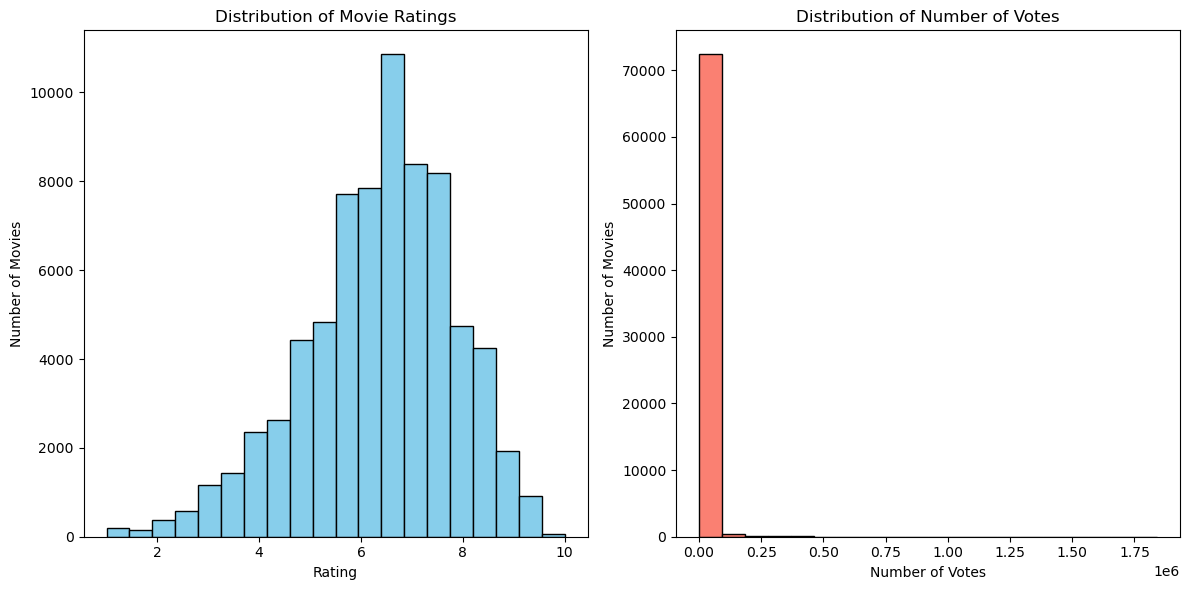

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot histogram for movie ratings
axes[0].hist(result['averagerating'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Movie Ratings')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Number of Movies')

# Plot histogram for number of votes
axes[1].hist(result['numvotes'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Distribution of Number of Votes')
axes[1].set_xlabel('Number of Votes')
axes[1].set_ylabel('Number of Movies')


# Display the plots
plt.tight_layout()
plt.show()

# Observations from the Histograms:

# Average Rating Distribution:
# - The majority of movies have average ratings clustered around 6.33
# - There are some movies with exceptionally high ratings, possibly above 7.4, and a few with very low ratings, likely below 5.5.
# - The distribution appears slightly skewed, with most movies concentrated around the average rating.

# Popularity Distribution:
# - Most movies have a relatively low number of votes, with many clustered towards the lower end of the vote count scale (e.g., below 289).
# - However, there are a few standout movies that have garnered a significantly higher number of votes, possibly exceeding 100,000.
# - The distribution shows a clear right skew, indicating that a small number of movies attract a disproportionately high number of votes compared to the rest of the dataset.


# Counting the occurrences of each genre in the dataset to identify the most popular genres
# By examining the frequency of different genres, we can identify which genres are most prevalent
# and potentially explore trends in audience preferences.


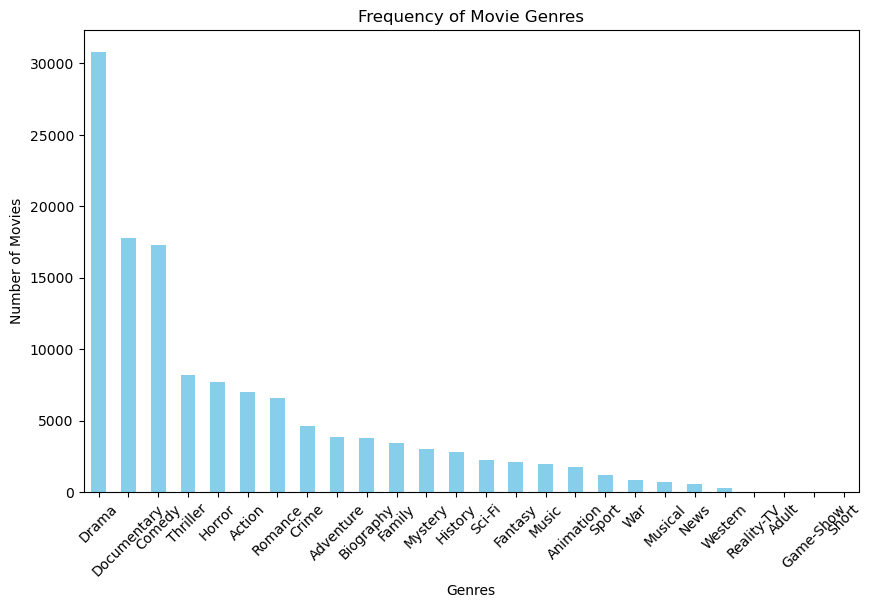

In [ ]:
# Count the frequency of each genre
genre_counts = result['genres'].str.split(',', expand=True).stack().value_counts()

# Plot the frequency of genres
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


# Interpretation of genre frequency counts:
# The top three most frequent genres are Drama, Documentary, and Comedy, with Drama being the most prevalent genre by a significant margin.
# Thriller, Horror, and Action follow as the next most common genres, indicating a preference for genres with elements of suspense and action.
# Romance, Crime, and Adventure also appear frequently, suggesting a diverse range of audience interests.
# Genres such as War, Musical, News, Western, Reality-TV, Adult, Game-Show, and Short are among the least common, indicating niche or specialized genres.

# Counting the occurrences of each genre in relation to the number of votes received
# This analysis aims to identify the popularity of genres based on the number of votes they receive
# and explore potential correlations between genre popularity and audience engagement.


In [ ]:
# Exploding the 'genres' column to create separate rows for each genre
exploded_genres = result['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genre')

# Merging the exploded genres with the original DataFrame
result_expanded = result.drop('genres', axis=1).join(exploded_genres)

# Grouping the data by genre and computing the mean number of votes for each genre
genre_votes_mean = result_expanded.groupby('genre')['numvotes'].mean()

# Sorting the genres by the mean number of votes in descending order
sorted_genre_votes_mean = genre_votes_mean.sort_values(ascending=False)

# Displaying the top 10 genres with the highest mean number of votes
top_genres_with_votes = sorted_genre_votes_mean.head(10)
top_genres_with_votes



genre
Adventure    22067.746660
Sci-Fi       19474.292384
Action       14476.485690
Fantasy      12387.443086
Animation     8808.549627
Western       8758.485714
Crime         8594.959011
Mystery       8113.618295
Thriller      5860.449434
Biography     5673.259648
Name: numvotes, dtype: float64

# Comparison of Genre Frequency Counts with Mean Number of Votes:
# 
# Adventure and Sci-Fi, which are not the most frequent genres, exhibit the highest mean number of votes. This suggests that while these genres may not be the most prevalent in terms of the total number of movies produced, they tend to attract a highly engaged audience.
# 
# Conversely, Drama, Documentary, and Comedy, which are the most frequent genres, do not appear among the top genres with the highest mean number of votes. This indicates that although these genres are popular in terms of the sheer quantity of movies produced, they may not always receive as much viewer engagement or attention compared to other genres.
# 
# Thriller and Action genres show a strong presence in both frequency counts and mean number of votes. This suggests that movies in these genres tend to not only be produced frequently but also receive a significant level of audience engagement, indicating a consistent interest from viewers.
# 
# Fantasy and Western genres, although among the least frequent, still demonstrate a notable level of mean number of votes. This indicates that despite being less common in terms of movie production, these genres continue to attract attention and engagement from viewers.
# 
# Other genres such as War, Musical, News, Reality-TV, Adult, Game-Show, and Short, which rank among the least frequent genres, also tend to receive lower mean number of votes. This suggests that while these genres may cater to specific interests or demographics, they may not attract as broad an audience or level of engagement compared to more mainstream genres.


# Created a line plot for visualizing trends over time, thus 
# making it suitable for analyzing the distribution of movies over the years based on their start year.



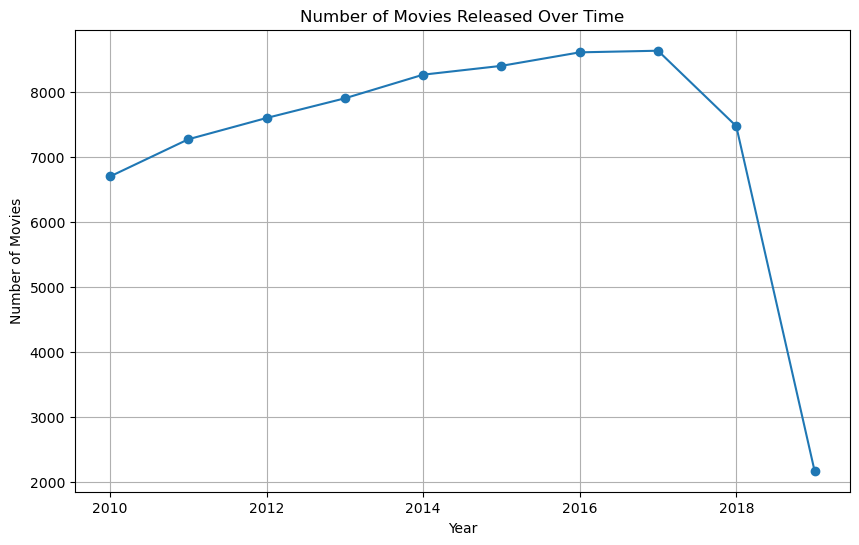

In [ ]:
# Code cell to generate the Line Plot for trend over time (start year)

# Importing necessary libraries
import matplotlib.pyplot as plt

# Grouping the data by start year and counting the number of movies for each year
movies_per_year = result.groupby('start_year').size()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', linestyle='-')
plt.title('Number of Movies Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()


Interpretation of the Line Plot:
# The line plot shows that the number of movies released over time has increased gradually from 2010, peaking around 2017.
# However, post-2017, there is a sharp decline in the number of movies released, with the rate of decline steepening after 2018.
# This trend suggests a potential saturation in the market or a shift in the film industry, possibly influenced by factors such as changing audience preferences, economic conditions, or industry regulations.
# For stakeholders in the film industry, this insight highlights the importance of adapting to evolving market trends and identifying new opportunities for growth or innovation.